# EDSA Apple Prices Challenge
### by team_32 on May 9, 2021
###### Dimakatso Mongwegelwa , Dineo  Mahlangu , Phuti Marokhu, Letlhogonolo Menwe, Siphamandla Mandindi

# Challenge Description
Team_32 is required to predict the price of golden delicus apples per kilogram in the fresh produce industry, the prices may depend on seasons. 

This solution is meant to help the farming industry economically, such that the users of the system are able to accurately determine how much stock they need to have on hand and what price to set the golden delicius apples. 

# Dataset Description

The Golden Delicious apples dataset was taken from the kaggle competition called the EDSA Apple Prices Challenge [1]. We would like to thank the Inventory Management Incubate team who did the initial work with this dataset. The dataset consists of 65 061 instances (rows) and 13 variables (columns).The following table describes variables that are in the dataset:

| Variable name | Type   | Definitions                      | Values and/or measure  |
|---------------|--------|----------------------------------| -----------------------|  
|Province	|Catagorical |	Province to which the apples come from?| *** distict values, eg. 'Cape'       |
|Container	|Catagorical |A Containers unique identifier	    |Not applicable          |
|Size_Grade	        |Categorical|	Quantity and Size if the grade of apples      | '1M' = '1 medium', '1L', '1X', '1S'| 
|Weight	        |Numeric	 |Weight of apples in Kilograms        |  	In Kilograms(kg)           |
|Commodities        |Categorical | raw material or primary agricultural product that can be bought and sold | 'APPLE GOLDEN DELICIOUS' |
|Date	        | Date-time | 	    Dates                    | in "YYYY-MM-DD" format     |
|Low_Price	        | Numeric  | Lowest prices	    | Positive integers    |
|High_Price|	Numeric | Highest prices |Positive integers|
|Sales_Total|	Numeric| Total sales made| Positive  floats | 
|Total_Kg_Sold	| Numeric|	Total unit(kg) of Apples sold |	Positive integers|
|Stock_On_Hand|Numeric |Shows how the hospital bill is to be paid or is paid|Positive integers|


## Notebook Outline
 1. Package Installation
 2. Importing Libraries
 3. Loading the Data
 4. Data Cleaning and Formating
 5. Exploratory Data Analysis
 6. Feature Engineering and Selection
 7. Linear regression & Parameter Tuning
 8. Model Evaluation
 9. Submission


# 1. Package Installation

In [ ]:
pip install -U flask numpy pandas scikit-learn

# 2. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
#import math from scipy
#import stats from scipy.stats

# 3. Loading the Dataset

In [9]:
df1 = pd.read_csv('sample_submission.csv')
df_test = pd.read_csv('df-test_set.csv')
df_train = pd.read_csv('df-train_set.csv')

## 3.1 Understanding the Data

In [10]:
df1.head()

,Index,avg_price_per_kg
0,1,13.94
1,2,1.30


In [11]:
df_test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [12]:
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [23]:
# checking how many entries are there in the dataset, this should correspond to the 65061 noted above
print ("The number of entries in training set:")
print(len(df_train)) 
print ("The number of entries in testing set:")
print(len(df_test)) 
print("The shape of the dataFrame is:")
print(df_train.shape)
print("The shape of the dataFrame is:")
print(df_test.shape)

print("the total entries of the dataset")
print(len(df_train) + len(df_test))

The number of entries in training set:
64376
The number of entries in testing set:
685
The shape of the dataFrame is:
(64376, 13)
The shape of the dataFrame is:
(685, 13)
the total entries of the dataset
65061


In [18]:
# Listing the Column names
df_train.columns

Index(['Province', 'Container', 'Size_Grade', 'Weight_Kg', 'Commodities',
       'Date', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg'],
      dtype='object')

In [22]:
# Checking Data types of the variables
df_train.dtypes

Province             object
Container            object
Size_Grade           object
Weight_Kg           float64
Commodities          object
Date                 object
Low_Price           float64
High_Price          float64
Sales_Total         float64
Total_Qty_Sold        int64
Total_Kg_Sold       float64
Stock_On_Hand         int64
avg_price_per_kg    float64
dtype: object

In [14]:
df_train.count()

Province            64376
Container           64376
Size_Grade          64376
Weight_Kg           64376
Commodities         64376
Date                64376
Low_Price           64376
High_Price          64376
Sales_Total         64376
Total_Qty_Sold      64376
Total_Kg_Sold       64376
Stock_On_Hand       64376
avg_price_per_kg    64376
dtype: int64

###### There are no empty cells in this dataframe. Thus we can continue with cleaning the data.

# 4. Data Cleaning and Formating

#### 4.1 Dealing with Missing Values 

In [24]:
# check for cell that are empty 
((df_train == " ").sum())

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [27]:
((df_train == "-").sum())

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [39]:
((df_train == "999").sum())

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [40]:
((df_train == "NaN").sum())

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

##### All the data is present in the datset as we observed no empty cells

#### 4.2 Dealing with special values

In [28]:
# checking your NaN - use encoding methods
df_train.isnull()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64371,False,False,False,False,False,False,False,False,False,False,False,False,False
64372,False,False,False,False,False,False,False,False,False,False,False,False,False
64373,False,False,False,False,False,False,False,False,False,False,False,False,False
64374,False,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
df_train.isnull().count()

Province            64376
Container           64376
Size_Grade          64376
Weight_Kg           64376
Commodities         64376
Date                64376
Low_Price           64376
High_Price          64376
Sales_Total         64376
Total_Qty_Sold      64376
Total_Kg_Sold       64376
Stock_On_Hand       64376
avg_price_per_kg    64376
dtype: int64

#### 4.3 Dealing with outliers

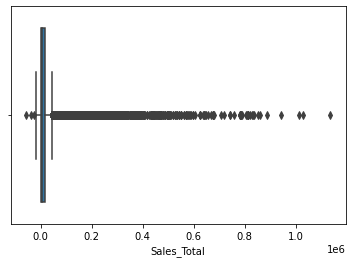

In [32]:
# use Histogram or Boxplot to see outliers and then remove
sns.boxplot(df_train['Sales_Total'])

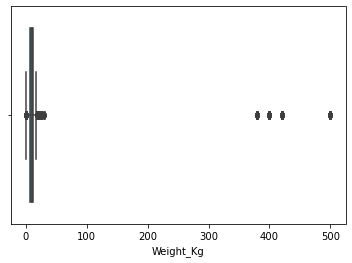

In [33]:
sns.boxplot(df_train['Weight_Kg'])

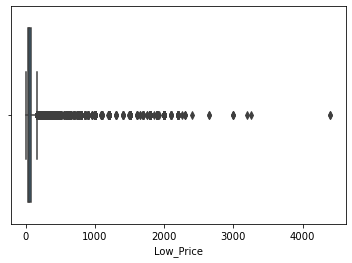

In [34]:
sns.boxplot(df_train['Low_Price'])

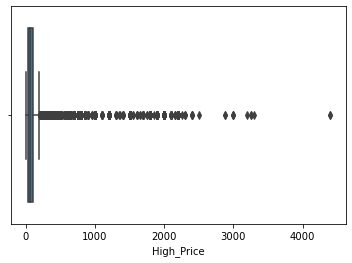

In [35]:
sns.boxplot(df_train['High_Price'])

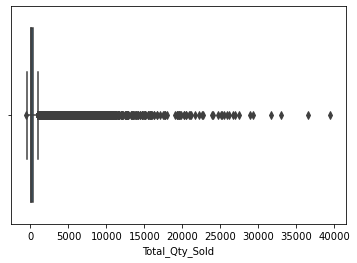

In [36]:
sns.boxplot(df_train['Total_Qty_Sold'])

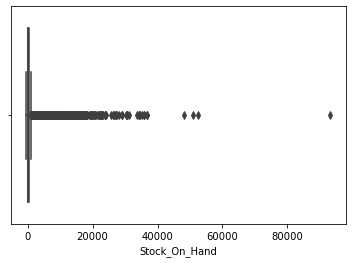

In [37]:
sns.boxplot(df_train['Stock_On_Hand'])

C:\Users\ndira\anaconda3\lib\site-packages\numpy\core\_methods.py:178: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


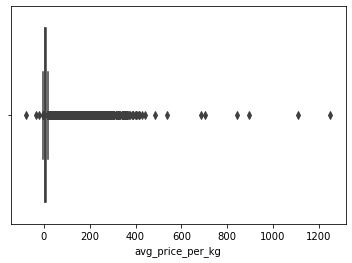

In [38]:
sns.boxplot(df_train['avg_price_per_kg']) 

###### This varaible has inconsistancies and must be delt with

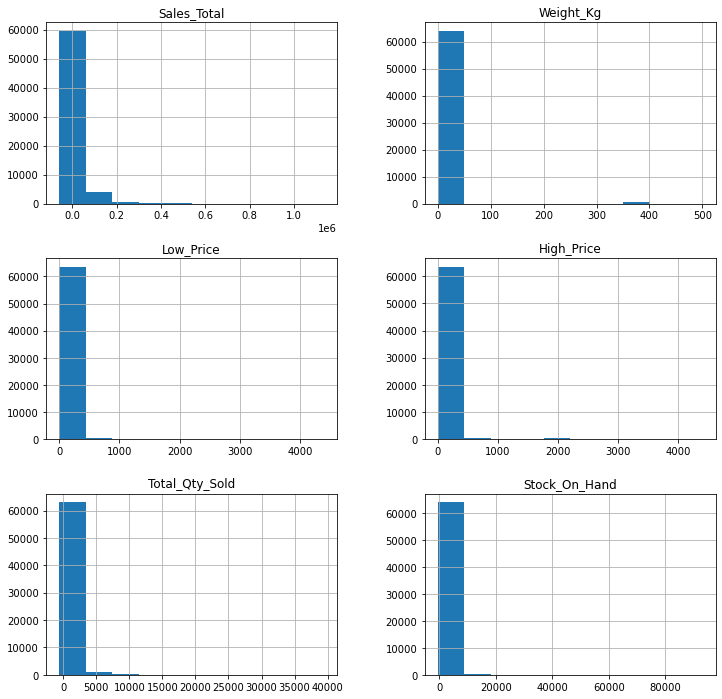

In [56]:
features = ['Sales_Total','Weight_Kg','Low_Price', 'High_Price', 'Total_Qty_Sold', 'Stock_On_Hand'] # create a list of all numerical features
df_train[features].hist(figsize=(12,12));

#### 4.4 Dealing with Inconsistancies

In [41]:
# inconsistancies = eg male, female , dog
# here, we will go through all the catagorical to look for inconsistancies

df_train["Province"].value_counts()

CAPE                        14635
TRANSVAAL                   12314
NATAL                        9855
KWAZULU NATAL                4124
WESTERN FREESTATE            3335
NORTHERN CAPE                2982
W.CAPE-BERGRIVER ETC         2745
WESTERN CAPE - CERES         2652
EASTERN FREESTATE            2006
SOUTH WESTERN FREE STATE     1797
WEST COAST                   1744
EASTERN CAPE                 1519
NORTH WEST                   1061
IMPORTS - OUTSIDE RSA        1005
NORTH EASTERN CAPE            776
ORANGE FREE STATE             630
OTHER AREAS                   617
MPUMALANGA                    272
MPUMALANGA MIDVELD            251
GAUTENG                        38
SOUTHERN CAPE                  11
NAMIBIA                         7
Name: Province, dtype: int64

In [44]:
df_train["Container"].value_counts()

PP100    12129
JE090     4830
AG100     4541
EC120     3605
M4183     3420
         ...  
SB270        2
DL076        1
IE500        1
A8145        1
TT025        1
Name: Container, Length: 153, dtype: int64

In [42]:
df_train["Size_Grade"].value_counts()

1M    10713
1L     7603
1S     6400
2M     4860
2S     3523
1Z     3483
2L     3305
1X     2670
1R     2467
1      2377
M      2259
L      1792
2Z     1488
3M     1377
1U     1352
2R      956
X       922
2X      814
1A      809
3Z      754
3L      671
3S      489
3R      486
S       368
2       333
2U      307
1G      253
4M      237
1B      222
2A      212
2B      155
0       151
2C       98
1C       87
3U       65
4L       64
4Z       57
G        49
4S       41
2G       39
4R       25
3X       15
0M       13
3G        7
4U        4
U         3
4X        1
Name: Size_Grade, dtype: int64

In [43]:
df_train["Commodities"].value_counts() 

POTATO (WASHED) MONDIAL    4134
TOMATOES-LONG LIFE         3849
ONIONS BROWN               3420
POTATO SIFRA (WASHED)      3092
ONIONS MILD                2714
                           ... 
PLUM SANTA ROSA               1
PLUM GOLDEN KING              1
GRAPE SALBA                   1
MANGO ZILL                    1
PLUM LARODA                   1
Name: Commodities, Length: 270, dtype: int64

#### 4.5 Dealing with Duplicates

In [ ]:
******************************************************************************************************************************

# 5. Exploratory Data Analysis

### 5.1 Univaraite Data analysis

##### Univariate Analysis: Non-Graphical

##### Summary Statistics

In [13]:
# Numeric Stats
df_train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,64376.000000,64376.000000,64376.000000,6.437600e+04,64376.000000,64376.000000,64376.000000,64376.00
mean,12.781592,75.651938,89.607858,1.939501e+04,446.104402,3336.641295,477.646328,NaN
std,35.943052,159.508144,172.223177,4.442192e+04,1184.169758,7682.295441,1453.892091,NaN
min,0.120000,1.000000,1.000000,-5.770000e+04,-595.000000,-5040.000000,-512.000000,-inf
25%,7.000000,30.000000,35.000000,1.154000e+03,20.000000,175.000000,0.000000,4.02
50%,10.000000,46.000000,55.000000,5.400000e+03,107.000000,940.000000,76.000000,6.00
75%,11.000000,80.000000,100.000000,1.877200e+04,390.000000,3250.000000,381.000000,8.67
max,500.000000,4400.000000,4400.000000,1.134701e+06,39453.000000,192230.000000,93193.000000,inf


In [21]:
# Catagotical Stats
df_train.describe(include='O')

,Province,Container,Size_Grade,Commodities,Date
count,64376,64376,64376,64376,64376
unique,22,153,47,270,147
top,CAPE,PP100,1M,POTATO (WASHED) MONDIAL,2020-07-01
freq,14635,12129,10713,4134,870


###### Checking skewness and Kurtosis

|   Skew Value (x)  |       Description of Data      |
|:-------------------|:---------------:|
| -0.5 < x < 0.5              |Fairly Symmetrical |
| -1 < x < -0.5 | Moderate Negative Skew  | 
| 0.5 < x < 1             | Moderate Positive Skew  | 
|       x < -1     |High Negative Skew  | 
|       x > 1  |High Positve Skew | 

In [54]:
df_train.skew()

Weight_Kg           10.746241
Low_Price           10.071797
High_Price           9.519075
Sales_Total          7.372393
Total_Qty_Sold       9.448153
Total_Kg_Sold        7.171355
Stock_On_Hand       13.767932
avg_price_per_kg          NaN
dtype: float64

In [55]:
df_train.kurtosis()

Weight_Kg           116.022033
Low_Price           123.977754
High_Price          109.763276
Sales_Total          89.378966
Total_Qty_Sold      152.646835
Total_Kg_Sold        83.222862
Stock_On_Hand       437.075702
avg_price_per_kg           NaN
dtype: float64

##### Univariate Analysis: Graphical

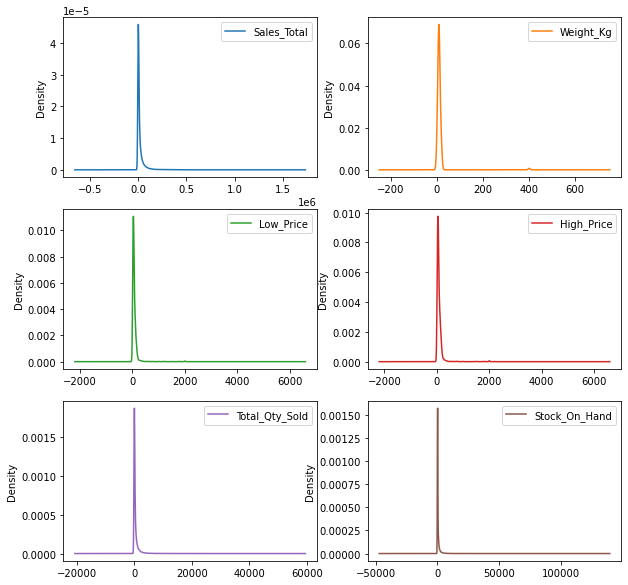

In [58]:
df_train[features].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

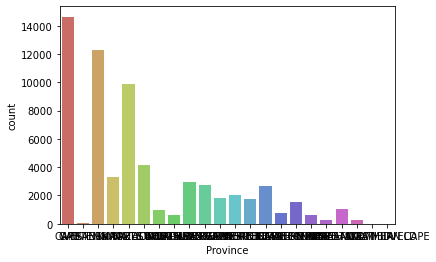

In [61]:
sns.countplot(x = 'Province', data = df_train, palette="hls")


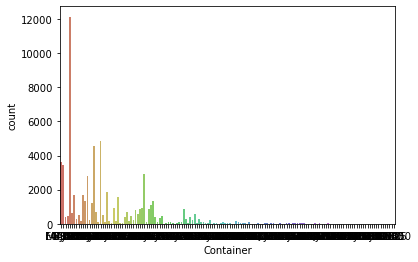

In [62]:
sns.countplot(x = 'Container', data = df_train, palette="hls")

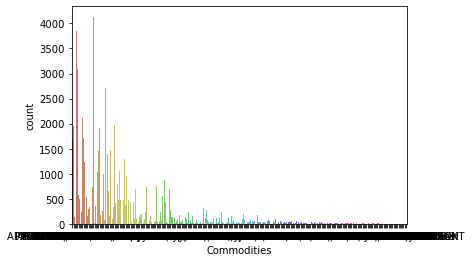

In [63]:
sns.countplot(x = 'Commodities', data = df_train, palette="hls")


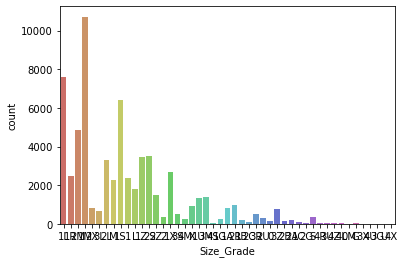

In [64]:
sns.countplot(x = 'Size_Grade', data = df_train, palette="hls")

#### 5.2 Multivariate Data analysis

In [ ]:
# check correlation with sales(research this). The ones(variables) with a high correlation we should select in below step.


In [ ]:
*******************************************************************************************************************************

# 6. Feature Engineering and Selection

In [ ]:
# here, we will create new variable that will help in the prediction (if necessary) eg BMI
# also select variables that contribute to the response variable

# 7. Linear regression & Parameter Tuning

In [ ]:
# Train-test split

In [ ]:
# Normalize the feature(this puts the data(variables) in the same space)

In [ ]:
# Define the linear regression algorithm

In [ ]:
# Predictions

In [ ]:
# Parameter tuning 

In [ ]:
# Predictions

# 8. Model Evaluation 

In [ ]:
# This is where we check perfomance matrices(measures)

# 9. Submission

# 10. Bibliography

[1] https://www.kaggle.com/c/edsa-apple-prices-challenge